13. Построить нечеткую базу знаний для задачи регулирования системы орошения
(учитывать время года, количество выпадающих озадков, вид орошаемой культуры и т.д.),
произвести нечеткий вывод для конкретных значений.

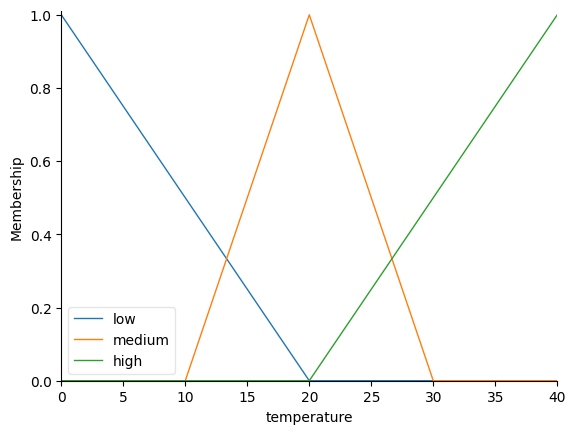

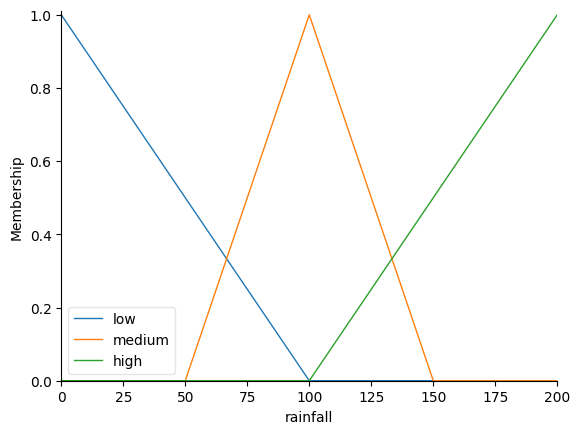

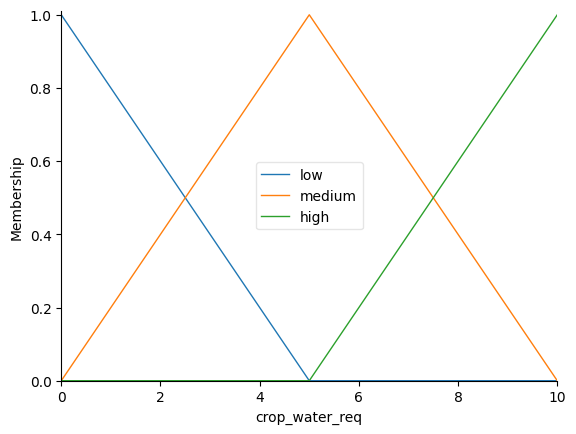

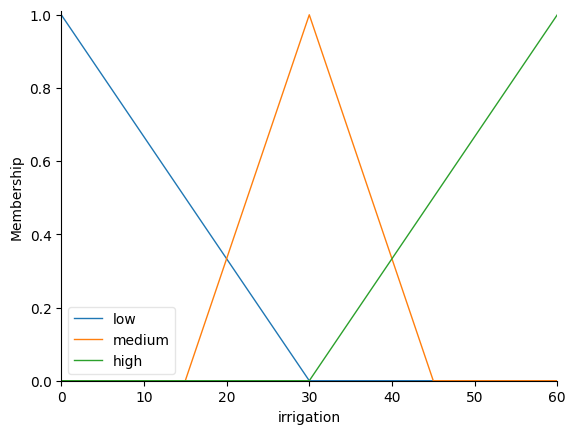

In [27]:
!pip install -U scikit-fuzzy scipy networkx
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Описание предметной области:
# Задача: регулирование системы орошения
#
# Входные переменные:
#   1. temperature (Температура, °C): 0 – 40
#      - Низкая: [0, 0, 20]
#      - Средняя: [10, 20, 30]
#      - Высокая: [20, 40, 40]
#
#   2. rainfall (Осадки, мм): 0 – 200
#      - Низкие: [0, 0, 100]
#      - Средние: [50, 100, 150]
#      - Высокие: [100, 200, 200]
#
#   3. crop_water_req (Водопотребление культуры): 0 – 10
#      - Низкое: [0, 0, 5]
#      - Среднее: [0, 5, 10]
#      - Высокое: [5, 10, 10]
#
# Выходная переменная:
#   1. irrigation (Интенсивность орошения, мин): 0 – 60
#      - Низкая: [0, 0, 30]
#      - Средняя: [15, 30, 45]
#      - Высокая: [30, 60, 60]

# Создание нечетких переменных
temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature')
rainfall = ctrl.Antecedent(np.arange(0, 201, 1), 'rainfall')
crop_water_req = ctrl.Antecedent(np.arange(0, 11, 1), 'crop_water_req')
irrigation = ctrl.Consequent(np.arange(0, 61, 1), 'irrigation')

# Задание функций принадлежности для входных переменных
temperature['low'] = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['medium'] = fuzz.trimf(temperature.universe, [10, 20, 30])
temperature['high'] = fuzz.trimf(temperature.universe, [20, 40, 40])

rainfall['low'] = fuzz.trimf(rainfall.universe, [0, 0, 100])
rainfall['medium'] = fuzz.trimf(rainfall.universe, [50, 100, 150])
rainfall['high'] = fuzz.trimf(rainfall.universe, [100, 200, 200])

crop_water_req['low'] = fuzz.trimf(crop_water_req.universe, [0, 0, 5])
crop_water_req['medium'] = fuzz.trimf(crop_water_req.universe, [0, 5, 10])
crop_water_req['high'] = fuzz.trimf(crop_water_req.universe, [5, 10, 10])

# Задание функций принадлежности для выходной переменной
irrigation['low'] = fuzz.trimf(irrigation.universe, [0, 0, 30])
irrigation['medium'] = fuzz.trimf(irrigation.universe, [15, 30, 45])
irrigation['high'] = fuzz.trimf(irrigation.universe, [30, 60, 60])

# Визуализация функций принадлежности
temperature.view()
rainfall.view()
crop_water_req.view()
irrigation.view()

Результаты нечеткого вывода:

Прогон 1:
  Температура: 24.51 °C
  Осадки: 43.28 мм
  Водопотребление культуры: 0.24
  Интенсивность орошения: 23.71 (ед. времени)


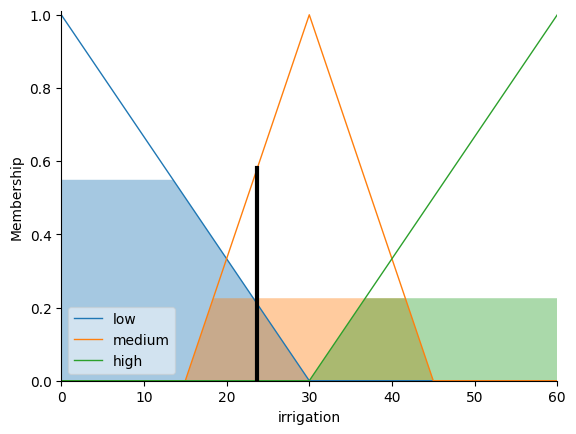


Прогон 2:
  Температура: 33.43 °C
  Осадки: 159.77 мм
  Водопотребление культуры: 9.04
  Интенсивность орошения: 40.06 (ед. времени)


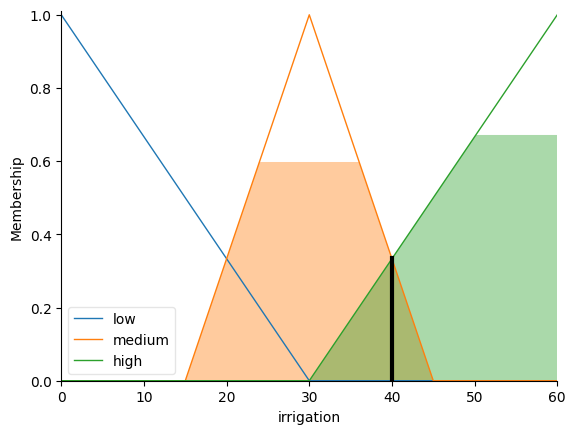


Прогон 3:
  Температура: 37.06 °C
  Осадки: 48.93 мм
  Водопотребление культуры: 5.20
  Интенсивность орошения: 41.45 (ед. времени)


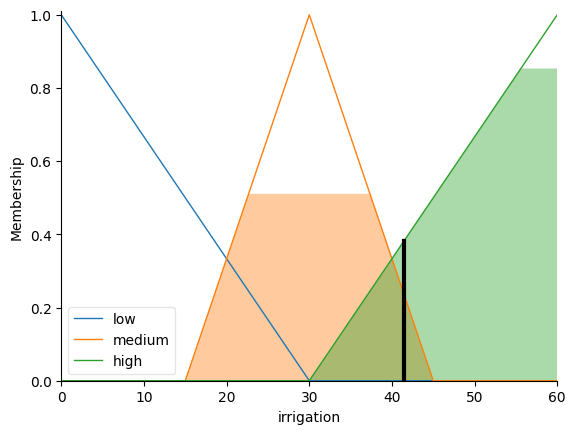


Прогон 4:
  Температура: 29.39 °C
  Осадки: 29.05 мм
  Водопотребление культуры: 0.38
  Интенсивность орошения: 37.68 (ед. времени)


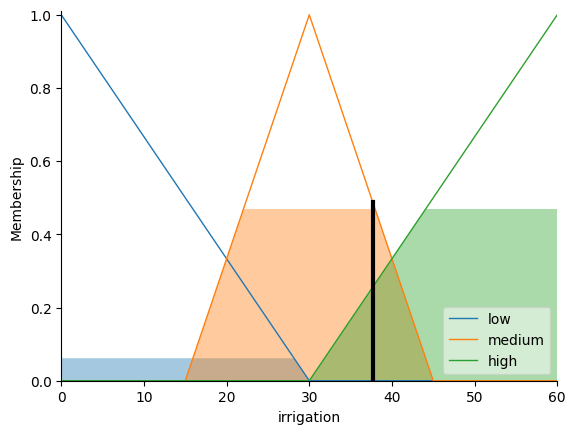


Прогон 5:
  Температура: 39.22 °C
  Осадки: 83.14 мм
  Водопотребление культуры: 8.88
  Интенсивность орошения: 45.01 (ед. времени)


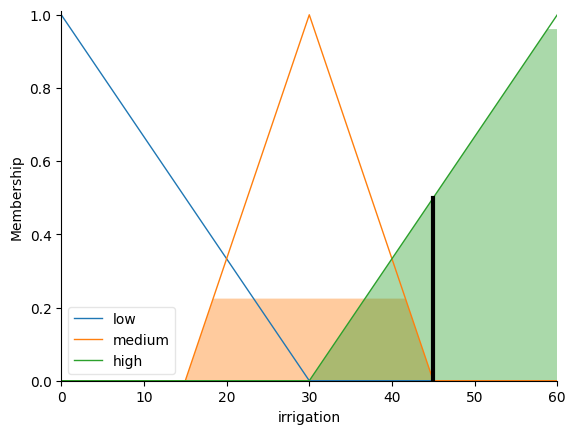


Прогон 6:
  Температура: 2.19 °C
  Осадки: 158.07 мм
  Водопотребление культуры: 5.47
  Интенсивность орошения: 10.11 (ед. времени)


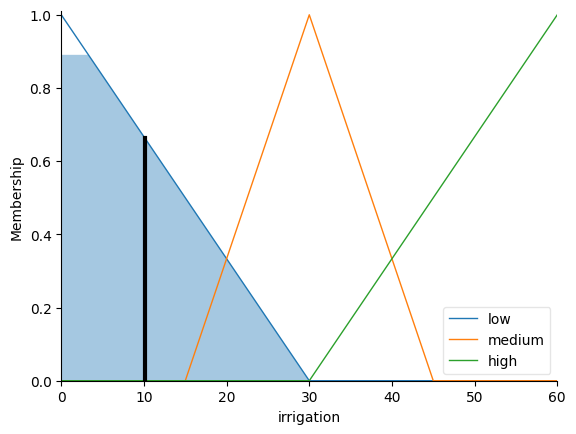

In [28]:
# Определение нечетких правил
rule1 = ctrl.Rule(rainfall['high'] & temperature['low'], irrigation['low'])
rule2 = ctrl.Rule(rainfall['high'] & temperature['medium'], irrigation['low'])
rule3 = ctrl.Rule(rainfall['high'] & temperature['high'], irrigation['medium'])
rule4 = ctrl.Rule(rainfall['medium'] & crop_water_req['medium'], irrigation['medium'])
rule5 = ctrl.Rule(rainfall['medium'] & crop_water_req['low'], irrigation['low'])
rule6 = ctrl.Rule(rainfall['low'] & crop_water_req['high'] & temperature['high'], irrigation['high'])
rule7 = ctrl.Rule(rainfall['low'] & crop_water_req['high'] & temperature['medium'], irrigation['high'])
rule8 = ctrl.Rule(rainfall['low'] & crop_water_req['high'] & temperature['low'], irrigation['medium'])
rule9 = ctrl.Rule(rainfall['low'] & crop_water_req['medium'] & temperature['high'], irrigation['medium'])
rule10 = ctrl.Rule(rainfall['low'] & crop_water_req['low'] & temperature['medium'] | temperature['low'], irrigation['low'])
rule11 = ctrl.Rule(rainfall['low'] & crop_water_req['low'] & temperature['high'], irrigation['medium'])
rule12 = ctrl.Rule(rainfall['low'] & temperature['high'], irrigation['medium'])
rule13 = ctrl.Rule(crop_water_req['high'] & temperature['medium'] | temperature['high'], irrigation['high'])

# Описание правил:
#   1. Если осадки высокие и температура низкая, то интенсивность орошения низкая
#   2. Если осадки высокие и температура средняя, то интенсивность орошения низкая
#   3. Если осадки высокие и температура высокая, то интенсивность орошения средняя
#   4. Если осадки средние и водопотребление культуры среднее, то интенсивность орошения средняя
#   5. Если осадки средние и водопотребление культуры низкое, то интенсивность орошения низкая
#   6. Если осадки низкие и водопотребление культуры высокое и температура высокая, то интенсивность орошения высокая
#   7. Если осадки низкие и водопотребление культуры высокое и температура средняя, то интенсивность орошения высокая
#   8. Если осадки низкие и водопотребление культуры высокое и температура низкая, то интенсивность орошения средняя
#   9. Если осадки низкие и водопотребление культуры среднее и температура высокая, то интенсивность орошения средняя
#   10. Если осадки низкие и водопотребление культуры низкое и температура средняя или низкая, то интенсивность орошения низкая
#   11. Если осадки низкие и водопотребление культуры низкое и температура высокая, то интенсивность орошения средняя
#   12. Если осадки низкие и температура высокая, то интенсивность орошения средняя
#   13. Если водопотребление культуры высокое и температура средняя или высокая, то интенсивность орошения высокая

# Создание базы нечеткого управления и симуляции
irrigation_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13])
irrigation_sim = ctrl.ControlSystemSimulation(irrigation_ctrl)

# Проведение нечеткого вывода для 6 различных наборов входных данных (случайным образом)
print("Результаты нечеткого вывода:")
for i in range(6):
    # Генерация случайных входных значений
    temp_input = np.random.uniform(0, 40)
    rain_input = np.random.uniform(0, 200)
    crop_input = np.random.uniform(0, 10)

    irrigation_sim.input['temperature'] = temp_input
    irrigation_sim.input['rainfall'] = rain_input
    irrigation_sim.input['crop_water_req'] = crop_input

    # Вычисление результата нечеткого вывода
    irrigation_sim.compute()

    print(f"\nПрогон {i+1}:")
    print(f"  Температура: {temp_input:.2f} °C")
    print(f"  Осадки: {rain_input:.2f} мм")
    print(f"  Водопотребление культуры: {crop_input:.2f}")
    print(f"  Интенсивность орошения: {irrigation_sim.output['irrigation']:.2f} (ед. времени)")

    irrigation.view(sim=irrigation_sim)
    plt.show()
